# Overfitting Figure Generation
We're going to generate `n_points` points distributed along a line, remembering that the formula for a line is $y = mx+b$. Modified (slightly) from [here](https://stackoverflow.com/a/35730618/8068638).

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
n_points = 12
m = 1
b = 0
training_delta = 3.0
test_points_offset = 0.5
test_points_jitter = 0.1
test_delta = 3.0
np.random.seed(14)

Now, we need to generate the testing and training "data"

In [3]:
points_x = np.arange(n_points)
training_delta = np.random.uniform(-training_delta, training_delta, size=(n_points))
training_points_y = m*points_x + b + training_delta

testing_points_x = points_x + np.random.uniform(-test_points_jitter, test_points_jitter, size=(n_points)) + test_points_offset
testing_delta = np.random.uniform(-test_delta, test_delta, size=(n_points))
testing_points_y = m*testing_points_x + b + testing_delta

We'll overfit by generating a $n$-dimensional polynomial

In [4]:
overfitted = np.poly1d(np.polyfit(points_x, training_points_y, n_points - 1))

In [5]:
x_space = np.linspace(-(n_points/5), 2*n_points+(n_points/5), n_points*100)
overfitted_x_space = np.linspace(-(n_points/5), 2*n_points+(n_points/5), n_points*100)

In [6]:
y_overfitted = overfitted(x_space)

## Plot it
Colors chosen from [Wong, B. (2011). Points of view: Color blindness. *Nature Methods, 8*(6), 441–441. doi:10.1038/nmeth.1618](doi.org/10.1038/nmeth.1618). I had to do some magic to make the arrays colors play nicely with matplotlib

In [7]:
def rgb_to_np_rgb(r, g, b):
    return (r / 255, g / 255, b / 255) 

orange = rgb_to_np_rgb(230, 159, 0)
blueish_green = rgb_to_np_rgb(0, 158, 115)
vermillion = rgb_to_np_rgb(213, 94, 0)
blue = rgb_to_np_rgb(0, 114, 178)

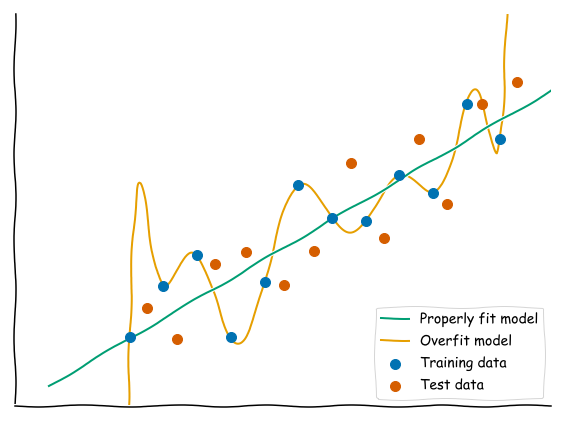

In [8]:
# configure the plot
plt.rcParams["figure.figsize"] = (12.8 * 0.75, 9.6 * 0.75)
plt.rcParams['svg.fonttype'] = 'path'
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams["xtick.labelbottom"] = False
plt.rcParams["xtick.bottom"] = False
plt.rcParams["ytick.left"] = False
plt.rcParams["ytick.labelleft"] = False
plt.xkcd() # for fun (see https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003858#s12)

# plot the data
plt.scatter(points_x, training_points_y, zorder=3,label="Training data", s=100, c=[blue])
plt.scatter(testing_points_x, testing_points_y, zorder=3,label="Test data", s=100, c=[vermillion])

plt.plot(x_space, m*x_space + b, zorder=2, label="Properly fit model", c=blueish_green)
plt.plot(x_space, y_overfitted, zorder=1, label="Overfit model", c=orange)

plt.xlim(-(n_points/5) - 1, max(testing_points_x) + 1)
plt.ylim(-(n_points/5) - 1, max(testing_points_y)+(n_points/5) + 1)

# plt.rcParams["figure.figsize"] = [6.4*2, 4.8*2]
plt.legend(loc=4)
plt.savefig('overfitting.svg', bbox_inches='tight')
plt.savefig('overfitting.png', dpi=150, bbox_inches='tight')